In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [ ]:
import matplotlib.pyplot as plt

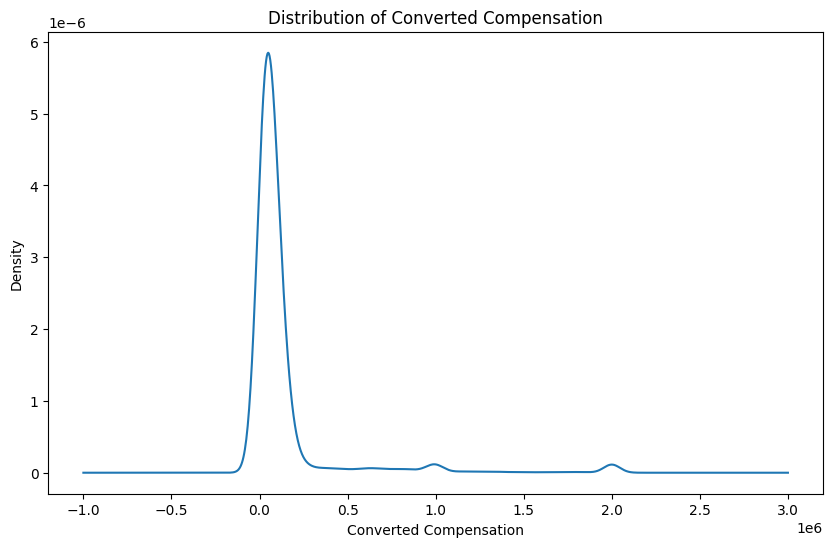

In [ ]:
#Plot the distribution curve for the column `ConvertedComp`.
plt.figure(figsize=(10, 6))
df['ConvertedComp'].plot(kind='density')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.show()

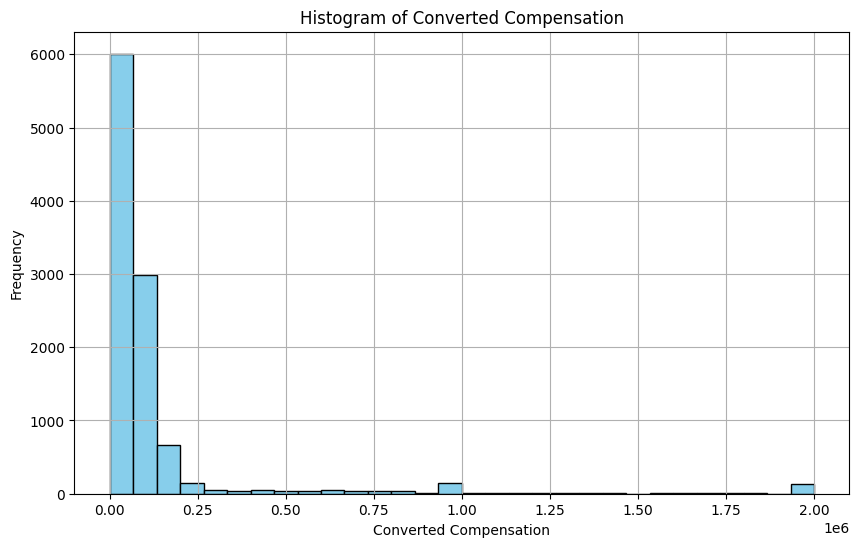

In [ ]:
#Plot the histogram for the column `ConvertedComp`.

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#What is the median of the column `ConvertedComp`?
median_converted_comp = df['ConvertedComp'].median()

In [ ]:
median_converted_comp = df['ConvertedComp'].median()

In [ ]:
print("Median of the column 'ConvertedComp':", median_converted_comp)

Median of the column 'ConvertedComp': 57745.0


In [ ]:
#How many responders identified themselves only as a **Man**?

In [ ]:
num_male_responders = df[df['Gender'] == 'Man'].shape[0]

In [ ]:
print("Number of responders identified only as a Man:", num_male_responders)

Number of responders identified only as a Man: 10480


In [ ]:
#Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?

In [ ]:
median_converted_comp_woman = df[df['Gender'] == 'Woman']['ConvertedComp'].median()

In [ ]:
print("Median ConvertedComp of responders identified only as a Woman:", median_converted_comp_woman)

Median ConvertedComp of responders identified only as a Woman: 57708.0


In [ ]:
#Give the five number summary for the column `Age`?

In [ ]:
min_age = df['Age'].min()

In [ ]:
q1_age = df['Age'].quantile(0.25)

In [ ]:
median_age = df['Age'].median()

In [ ]:
q3_age = df['Age'].quantile(0.75)

In [ ]:
max_age = df['Age'].max()

In [ ]:
print("Minimum age:", min_age)

Minimum age: 16.0


In [ ]:
print("First quartile (Q1):", q1_age)

First quartile (Q1): 25.0


In [ ]:
print("Median age:", median_age)

Median age: 29.0


In [ ]:
print("Third quartile (Q3):", q3_age)

Third quartile (Q3): 35.0


In [ ]:
print("Maximum age:", max_age)

Maximum age: 99.0


In [ ]:
#Plot a histogram of the column `Age`.

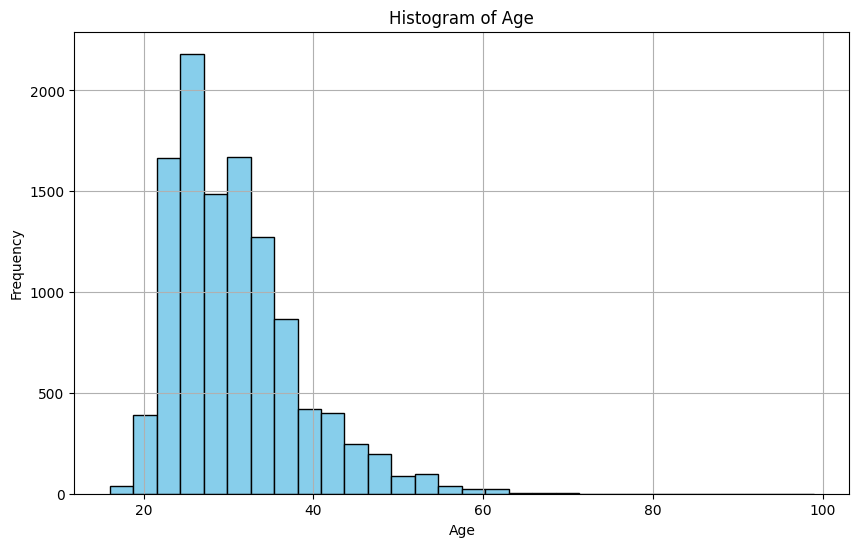

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#Find out if outliers exist in the column `ConvertedComp` using a box plot?

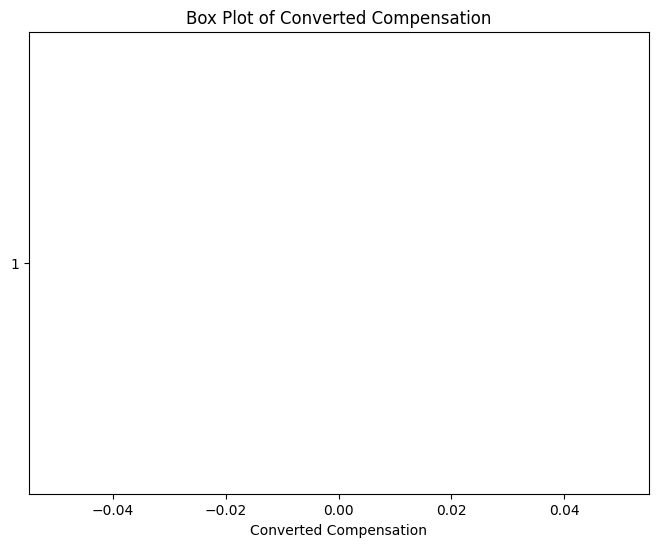

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.show()

In [ ]:
#Find out the Inter Quartile Range for the column `ConvertedComp`.

In [ ]:
Q1 = df['ConvertedComp'].quantile(0.25)

In [ ]:
Q3 = df['ConvertedComp'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
print("Interquartile Range (IQR) for the column 'ConvertedComp':", IQR)

Interquartile Range (IQR) for the column 'ConvertedComp': 73132.0


In [ ]:
# Find out the upper and lower bounds.

In [ ]:
lower_bound = Q1 - 1.5 * IQR

In [ ]:
upper_bound = Q3 + 1.5 * IQR

In [ ]:
print("Lower Bound:", lower_bound)

Lower Bound: -82830.0


In [ ]:
print("Upper Bound:", upper_bound)

Upper Bound: 209698.0


In [ ]:
#Identify how many outliers are there in the `ConvertedComp` column.

In [ ]:
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

In [ ]:
# Count the number of outliers

In [ ]:
num_outliers = outliers.shape[0]

In [ ]:
print("Number of outliers in the 'ConvertedComp' column:", num_outliers)

Number of outliers in the 'ConvertedComp' column: 879


In [ ]:
#Create a new dataframe by removing the outliers from the `ConvertedComp` column.

In [ ]:
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

In [ ]:
# Display the first few rows of the new DataFrame
print("New DataFrame without outliers:")
print(df_no_outliers.head())

New DataFrame without outliers:
   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  

In [ ]:
#Find the correlation between `Age` and all other numerical columns.

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
correlation = df[numeric_columns].corr()['Age']

In [ ]:
print("Correlation between 'Age' and all other numerical columns:")
print(correlation)

Correlation between 'Age' and all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64
